In [ ]:
#xemthu co truy cap vao trang web dc ko
import requests

url = "https://nld.com.vn/"
response = requests.get(url)

if response.status_code == 200:
    print("Truy cập thành công vào trang web!")
    print("URL: ", response.url)
    print("Nội dung trang web: ", response.text)
else:
    print("Truy cập không thành công. Mã trạng thái:", response.status_code)


In [ ]:
#quetso qua trang web lay tat ca the h3 va gan link
from bs4 import BeautifulSoup
import requests

url = "https://nld.com.vn/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

h3_tags = soup.find_all("h3")
for h3 in h3_tags:
    print(h3.text)
    links = h3.find_all("a")
    for link in links:
        href = link.get("href")
        print(href)

In [2]:
from bs4 import BeautifulSoup
import requests
from collections import Counter

url = "https://nld.com.vn/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Lấy nội dung văn bản từ trang web
text = soup.get_text()

# Tách từ
words = text.split()

# Thống kê từ khóa
word_counter = Counter(words)
top_keywords = word_counter.most_common(10)

# In kết quả
for keyword, count in top_keywords:
    print(keyword, count)

của 52
- 51
người 32
TP 28
cho 26
Công 25
bị 25
ở 25
động 20
trong 20


In [1]:
#taocactieu de bai bao va url luu trong file xlsx de luu vao postgres sau khi xu khi luu thanh file csv
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://nld.com.vn/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Tìm các thẻ liên kết đến các bài báo trên trang web
article_links = soup.find_all("a")
tonghop = []

# Tạo danh sách các tiêu đề và URL của bài báo
for link in article_links:
    article_url = 'https://nld.com.vn/' + link.get("href")
    article_title = link.text.strip()
    tonghop.append([article_title, article_url])

# Tạo DataFrame từ danh sách thông tin bài báo
df = pd.DataFrame(tonghop, columns=["Tiêu đề bài báo", "URL bài báo"])

# Lưu DataFrame vào file Excel
df.to_excel("thongtin_baibao.xlsx", index=False)
df = df.dropna()

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.5 MB/s eta 0:00:000:00:010:00:01


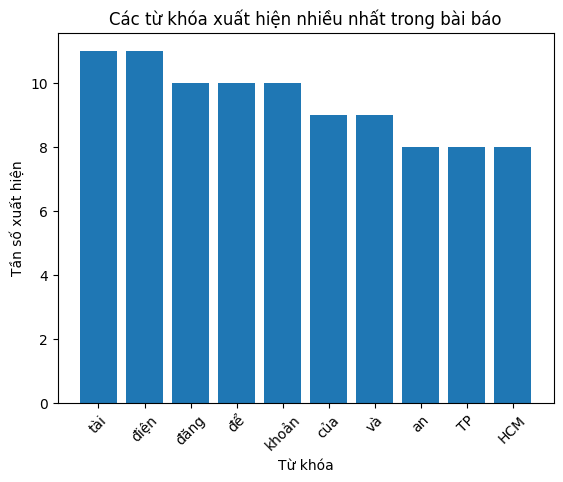

In [2]:

#thongketukhoachinh xuagt hien tu 1 trang bao cu the
!pip install openpyxl
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt

# Tải nội dung của bài báo từ URL
url = 'https://nld.com.vn/phap-luat/cong-an-tp-hcm-lat-tay-kho-hang-cua-ong-trum-ngo-tan-dat-20231104152843342.htm'
response = requests.get(url)
html_content = response.text

# Phân tích cú pháp HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Trích xuất văn bản từ các thẻ <p>
paragraphs = soup.find_all('p')

# Tạo danh sách các từ khóa từ văn bản
keywords = []
for paragraph in paragraphs:
    text = paragraph.get_text()
    words = text.split()
    keywords.extend(words)

# Đếm tần số xuất hiện của từng từ khóa
keyword_counts = Counter(keywords)

# Lấy 10 từ khóa xuất hiện nhiều nhất
top_keywords = keyword_counts.most_common(10)

# Tách các từ khóa và tần số xuất hiện thành 2 danh sách riêng
keywords, counts = zip(*top_keywords)

# Vẽ biểu đồ cột của các từ khóa và tần số xuất hiện
plt.bar(keywords, counts)
plt.xlabel('Từ khóa')
plt.ylabel('Tần số xuất hiện')
plt.title('Các từ khóa xuất hiện nhiều nhất trong bài báo')
plt.xticks(rotation=45)
plt.show()


In [3]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [2]:


#import tieu de
from bs4 import BeautifulSoup
import requests
import pandas as pd
url = "https://nld.com.vn/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
titles = soup.find_all("div", class_="item-news-thumb")
data = []
for title in titles:
    data.append(title.text.strip())
df = pd.DataFrame(data, columns=["Tiêu đề"])
df.to_excel("data.xlsx", index=False)


In [ ]:
pip install nltk

In [9]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist



In [ ]:
!pip install newspaper3k


In [1]:
import newspaper

# Tạo đối tượng bài báo
article = newspaper.Article('https://nld.com.vn/thoi-su/dai-bieu-qh-mong-cac-bo-truong-truong-nganh-khong-ne-tranh-khi-tra-loi-chat-van-20231106082234955.htm')

# Tải và phân tích bài báo
article.download()
article.parse()

# In nội dung chính của bài báo
print(article.text)

# Thống kê ý chính hoặc từ ngữ xuất hiện nhiều
word_counts = {}
words = article.text.split()
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Sắp xếp theo số lần xuất hiện giảm dần
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# In kết quả
for word, count in sorted_word_counts:
    print(f"{word}: {count}")
    

Sáng 6-11, Quốc hội (QH) bắt đầu thực hiện nội dung chất vấn và trả lời chất vấn tại kỳ họp thứ 6, QH khóa XV.

ĐBQH Trần Thị Nhị Hà kỳ vọng phiên chất vấn sẽ giải quyết được những vấn đề "nóng" của ngành y tế

ĐBQH Trần Thị Nhị Hà (Đoàn ĐBQH TP Hà Nội) cho biết hoạt động chất vấn là một hình thức giám sát trực tiếp và thường xuyên nhằm làm sáng tỏ những vấn đề được chất vấn và xác định rõ trách nhiệm của chức danh bị chất vấn. Trong những kỳ họp gần đây, QH đã có những đổi mới, đáp ứng được sự mong mỏi của cử tri, Nhân dân. Các phiên họp chất vấn của QH được truyền hình trực tiếp luôn dành được sự quan tâm của cử tri cả nước.



Kỳ họp thứ 6 sẽ có nhiều thay đổi về cách thức tiến hành chất vấn. QH sẽ không chất vấn theo nhóm vấn đề như thông lệ, mà tiến hành theo nhóm các lĩnh vực. Một điểm mới rất đặc biệt khác là các nội dung chất vấn sẽ liên quan đến những tồn tại, hạn chế trong việc thực hiện một số nghị quyết của QH khóa 14 và từ đầu nhiệm kỳ QH khóa XV đến hết Kỳ họp thứ 4 về gi

In [2]:
import requests
from bs4 import BeautifulSoup

# Lấy nội dung của trang web
url = 'https://nld.com.vn/thoi-su/dai-bieu-qh-mong-cac-bo-truong-truong-nganh-khong-ne-tranh-khi-tra-loi-chat-van-20231106082234955.htm'
response = requests.get(url)
html_content = response.text

# Phân tích cú pháp HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Lấy nội dung văn bản trong thẻ <p>
paragraphs = soup.find_all('p')

# Đếm số từ trong nội dung văn bản
word_count = 0
for paragraph in paragraphs:
    words = paragraph.text.split()
    word_count += len(words)

# In kết quả
print(f"Số từ xuất hiện trong trang web là: {word_count}")

Số từ xuất hiện trong trang web là: 1670


In [ ]:
import newspaper
import matplotlib.pyplot as plt

# Tạo đối tượng bài báo
article = newspaper.Article('https://nld.com.vn/thoi-su/dai-bieu-qh-mong-cac-bo-truong-truong-nganh-khong-ne-tranh-khi-tra-loi-chat-van-20231106082234955.htm')

# Tải và phân tích bài báo
article.download()
article.parse()

# Thống kê ý chính hoặc từ ngữ xuất hiện nhiều
word_counts = {}
words = article.text.split()
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Sắp xếp theo số lần xuất hiện giảm dần
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# In kết quả
for word, count in sorted_word_counts:
    print(f"{word}: {count}")

# Vẽ bảng thống kê từ ngữ đã xuất hiện
top_words = [word for word, count in sorted_word_counts[:10]]
word_counts = [count for word, count in sorted_word_counts[:10]]

plt.bar(top_words, word_counts)
plt.xlabel('Từ ngữ')
plt.ylabel('Số lần xuất hiện')
plt.title('Bảng thống kê từ ngữ đã xuất hiện')
plt.xticks(rotation=45)
plt.show()

In [11]:
from bs4 import BeautifulSoup
import requests

# URL của bài báo
url = 'https://nld.com.vn/phap-luat/bat-giam-doc-cong-ty-mua-ban-dien-cua-evn-20231109194005772.htm'

# Lấy nội dung HTML từ URL
response = requests.get(url)
html_content = response.text

# Sử dụng BeautifulSoup để phân tích cú pháp HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Tìm và tóm tắt ý chính của bài báo
summary = soup.find('h2', class_='sapo-detail').text.strip()
print(summary)


(NLĐO)- Cáo buộc có vi phạm trong vụ án xảy ra tại Bộ Công Thương, Cơ quan An ninh điều tra đã khởi tố, bắt giam đối với Nguyễn Danh Sơn, Giám đốc Công ty Mua bán điện - Tập đoàn Điện lực Việt Nam
